In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [4]:
data = pd.read_csv("Melbourne_housing_FULL.csv")

In [5]:
data.shape

(34857, 21)

In [6]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
data.Price.count()

27247

In [9]:
data_no_nulls_in_target = data[~ data.Price.isnull()]

In [10]:
data_no_nulls_in_target.Price.count()

27247

In [11]:
data_no_nulls_in_target.shape

(27247, 21)

In [12]:
from sklearn.model_selection import ShuffleSplit
shuffleSplit = ShuffleSplit(n_splits=1,test_size = 0.2 , random_state=42)
for train_index, test_index in shuffleSplit.split(data_no_nulls_in_target):
    training_set = data_no_nulls_in_target.loc[train_index]
    test_set = data_no_nulls_in_target.loc[test_index]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [13]:
training_set.shape

(21797, 21)

In [14]:
training_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17957,Carnegie,29 Holywood Gr,3.0,h,1370000.0,S,Gary,12/08/2017,10.1,3163.0,...,1.0,2.0,485.0,NaN,NaN,Glen Eira City Council,-37.88553,145.05012,Southern Metropolitan,7822.0
6753,Middle Park,96 Hambleton St,3.0,h,2956000.0,S,Marshall,4/03/2017,4.1,3206.0,...,2.0,0.0,300.0,NaN,NaN,Port Phillip City Council,-37.84770,144.96070,Southern Metropolitan,2019.0
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17054,Hughesdale,198 Poath Rd,3.0,h,1250000.0,VB,hockingstuart,27/05/2017,12.3,3166.0,...,1.0,2.0,603.0,NaN,NaN,Monash City Council,-37.90192,145.07560,Southern Metropolitan,3145.0


In [15]:
training_set.isnull().any()

Suburb           True
Address          True
Rooms            True
Type             True
Price            True
Method           True
SellerG          True
Date             True
Distance         True
Postcode         True
Bedroom2         True
Bathroom         True
Car              True
Landsize         True
BuildingArea     True
YearBuilt        True
CouncilArea      True
Lattitude        True
Longtitude       True
Regionname       True
Propertycount    True
dtype: bool

In [16]:
training_set.dtypes.value_counts()

float64    13
object      8
dtype: int64

In [17]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            True
Price            True
Distance         True
Postcode         True
Bedroom2         True
Bathroom         True
Car              True
Landsize         True
BuildingArea     True
YearBuilt        True
Lattitude        True
Longtitude       True
Propertycount    True
dtype: bool

In [18]:
training_set.select_dtypes(['object']).isnull().any()

Suburb         True
Address        True
Type           True
Method         True
SellerG        True
Date           True
CouncilArea    True
Regionname     True
dtype: bool

In [19]:
df_null_postcodes = training_set[training_set['Postcode'].isnull()]

In [20]:
df_null_postcodes.shape

(4772, 21)

In [21]:
df_null_postcodes[~ df_null_postcodes['Suburb'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [22]:
df_non_null_postcodes = training_set[~ training_set['Postcode'].isnull()]

In [23]:
df_non_null_postcodes.groupby(['Suburb','Postcode']).size().shape

(329,)

In [24]:
diction = dict(df_non_null_postcodes.groupby(['Suburb','Postcode']).size().index)

In [25]:
len(diction)

329

In [26]:
training_set[training_set['Postcode'].isnull()].index

Int64Index([ 1833, 19795, 22210,  3233, 23980,  1026,  1174, 12291,  1197,
            19854,
            ...
              189, 26382, 25551,  6396, 19769, 17568,  5311, 23333,  6265,
            15795],
           dtype='int64', length=4772)

In [27]:
training_set = training_set.drop(training_set[training_set['Postcode'].isnull()].index)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


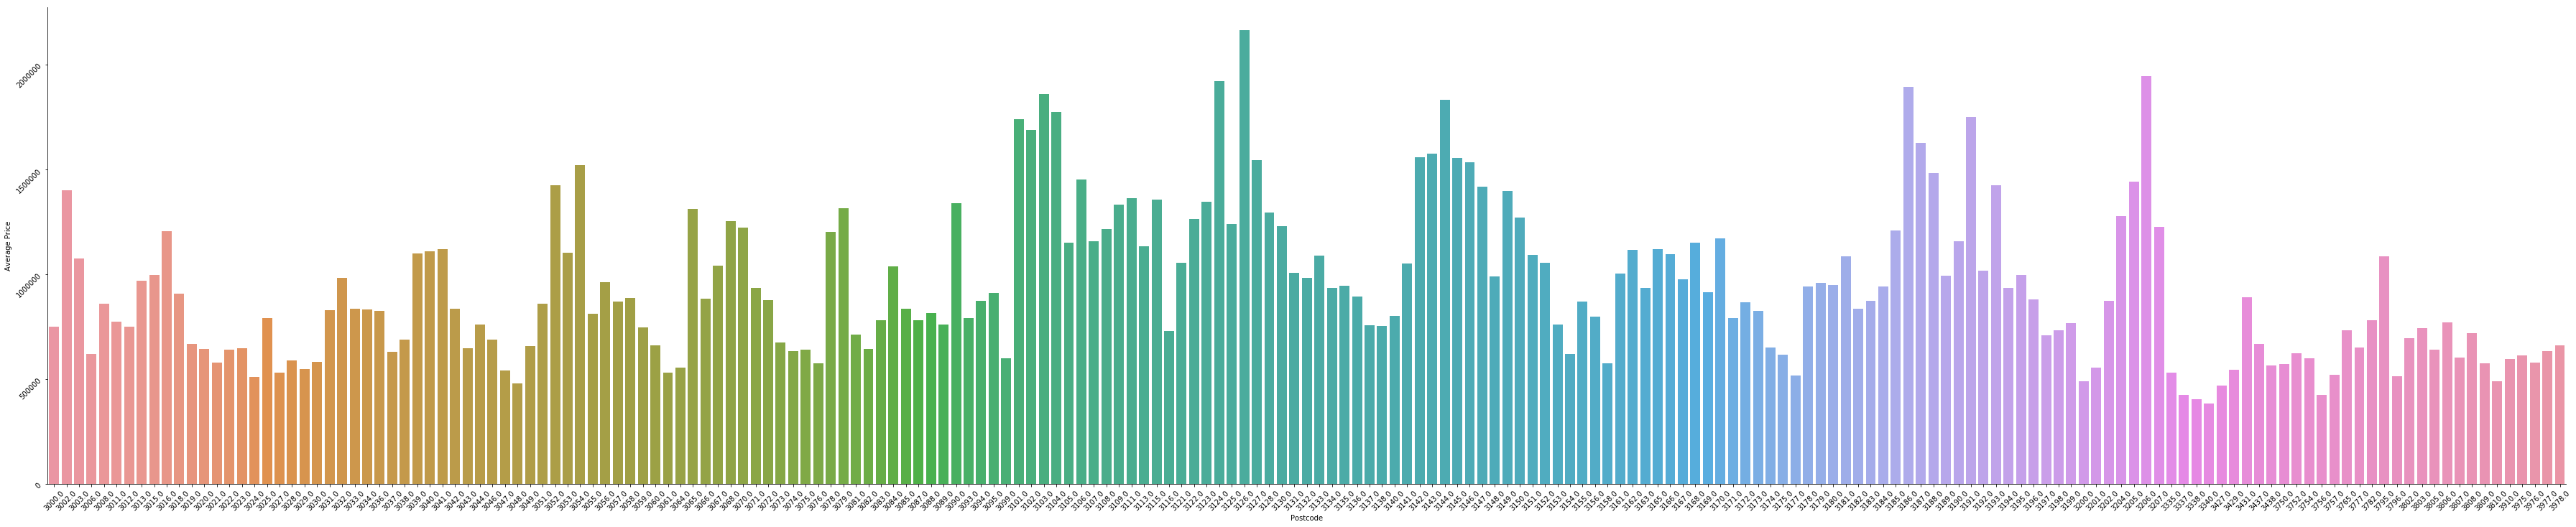

In [35]:
gr = sns.factorplot(data=training_set, x="Postcode", y="Price", kind="bar", ci=None,size=10, aspect=5)
plt.xlabel("Postcode")
plt.ylabel("Average Price")
l1 = gr.set_yticklabels(rotation = 45)
l2 = gr.set_xticklabels(rotation = 45)
plt.show()

In [29]:
training_set.drop(["Address", "CouncilArea", "Regionname", "Lattitude", "Suburb", "Longtitude"], axis=1, inplace=True)

In [30]:
training_set.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Propertycount'],
      dtype='object')

In [32]:
training_set.head()

,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
17957,3.0,h,1370000.0,S,Gary,12/08/2017,10.1,3163.0,3.0,1.0,2.0,485.0,NaN,NaN,7822.0
6753,3.0,h,2956000.0,S,Marshall,4/03/2017,4.1,3206.0,3.0,2.0,0.0,300.0,NaN,NaN,2019.0
17054,3.0,h,1250000.0,VB,hockingstuart,27/05/2017,12.3,3166.0,3.0,1.0,2.0,603.0,NaN,NaN,3145.0
19340,2.0,u,682000.0,S,Jellis,29/07/2017,7.7,3124.0,2.0,1.0,1.0,1106.0,NaN,1970.0,8920.0
14883,3.0,h,740000.0,S,Ray,3/06/2017,17.9,3192.0,NaN,NaN,NaN,NaN,NaN,NaN,9758.0


In [33]:
training_set.select_dtypes(['object']).isnull().any()

Type       False
Method     False
SellerG    False
Date       False
dtype: bool

In [36]:
training_set.Date = pd.to_datetime(training_set.Date)

In [37]:
training_set["sold_year"] = training_set.Date.apply(lambda x: x.year)

In [38]:
training_set.drop("Date", axis=1, inplace=True)

In [39]:
training_set.select_dtypes(['float64','int64']).isnull().any()

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Propertycount    False
sold_year        False
dtype: bool

In [40]:
training_set[training_set.Bedroom2.isnull()].shape

(3465, 15)

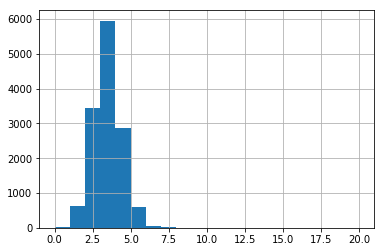

In [41]:
training_set.Bedroom2.hist(bins=20)

In [42]:
training_set.Bedroom2.fillna(value=training_set.Bedroom2.mean(), inplace=True)

In [43]:
training_set[training_set.Bathroom.isnull()].shape

(3468, 15)

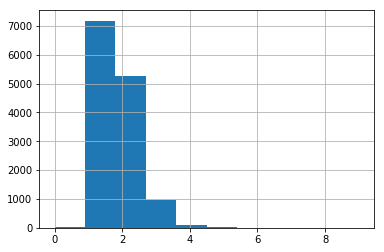

In [44]:
training_set.Bathroom.hist(bins=10)

In [45]:
training_set.Bathroom.mode()

0    1.0
dtype: float64

In [46]:
training_set.Bathroom.fillna(value=training_set.Bathroom.mode(), inplace=True)

In [47]:
training_set[training_set.Car.isnull()].shape

(3616, 15)

In [48]:
training_set[training_set.Car.isnull()].shape

(3616, 15)

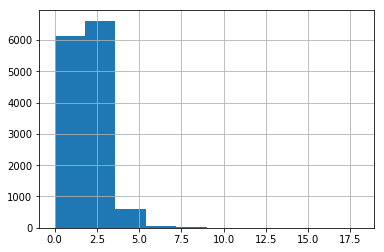

In [49]:
training_set.Car.hist(bins=10)

In [50]:
training_set.Car.fillna(value=training_set.Car.median(), inplace=True)

In [51]:
training_set[training_set.Landsize.isnull()].shape

(5166, 15)

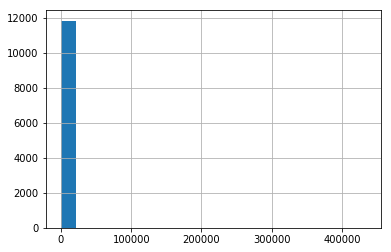

In [52]:
training_set.Landsize.hist(bins=20)

In [53]:
training_set.Landsize.describe()

count     11859.000000
mean        595.647188
std        4519.336354
min           0.000000
25%         192.000000
50%         466.000000
75%         656.000000
max      433014.000000
Name: Landsize, dtype: float64

In [54]:
training_set[training_set.Landsize == 0].shape

(1528, 15)

In [55]:
training_set[training_set.Landsize > 656].shape

(2948, 15)

In [56]:
training_set[training_set.Landsize < 219].shape

(3357, 15)

In [57]:
training_set[training_set.Landsize < 0].shape

(0, 15)

In [58]:
training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0].shape

(10331, 15)

In [59]:
training_set["Landsize_log"] = np.log(training_set[~training_set.Landsize.isnull() & training_set.Landsize > 0]['Landsize'])

In [60]:
training_set["Landsize_log"].describe()

count    10331.000000
mean         6.096866
std          0.736103
min          0.000000
25%          5.638355
50%          6.291569
75%          6.522093
max         12.978525
Name: Landsize_log, dtype: float64

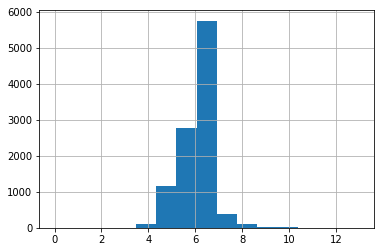

In [61]:
training_set["Landsize_log"].hist(bins=15)

In [62]:
Landsize_log_mean = training_set["Landsize_log"].mean()
training_set["Landsize_log"].fillna(value=Landsize_log_mean, inplace=True)
training_set["Landsize_log"] = training_set["Landsize_log"].apply(lambda x: Landsize_log_mean if x == 0 else x)

In [63]:
training_set.drop('Landsize', axis=1, inplace=True)

In [64]:
training_set.fillna(value= training_set.mean()[["BuildingArea", "YearBuilt", "Propertycount"]], inplace=True)

In [65]:
training_set.select_dtypes(['object']).columns

Index(['Type', 'Method', 'SellerG'], dtype='object')

In [66]:
training_set['Method'].value_counts()

S     11087
SP     2208
PI     2034
VB     1575
SA      121
Name: Method, dtype: int64

In [67]:
training_set.groupby(['Method'])['Price'].mean()

Method
PI    1.111503e+06
S     1.063461e+06
SA    9.976520e+05
SP    8.772109e+05
VB    1.152664e+06
Name: Price, dtype: float64

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-21.325000000000003, 0.5, 'Mean Price')

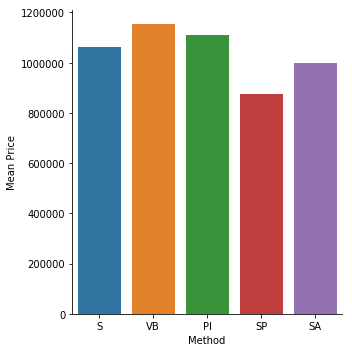

In [68]:
sns.factorplot(data=training_set, x="Method", y="Price", kind="bar", ci=None)
plt.ylabel("Mean Price")

In [69]:
import statsmodels.stats.multicomp as multi

mc1 = multi.MultiComparison(training_set["Price"],training_set["Method"])
res1 = mc1.tukeyhsd()
print(res1.summary())

     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper     reject
-----------------------------------------------------------
  PI     S    -48041.5099  -89770.8057   -6312.2141   True 
  PI     SA   -113850.6874 -275731.5702  48030.1953  False 
  PI     SP   -234291.7744 -287459.7849 -181123.7639  True 
  PI     VB    41161.4726  -16903.9744   99226.9196  False 
  S      SA   -65809.1776  -223935.5975  92317.2424  False 
  S      SP   -186250.2645 -226566.2889 -145934.2402  True 
  S      VB    89202.9825   42618.2144  135787.7506   True 
  SA     SP   -120441.087  -281963.4318  41081.2579  False 
  SA     VB    155012.16    -8187.7992  318212.1193  False 
  SP     VB    275453.247  218394.9976  332511.4964   True 
-----------------------------------------------------------


In [70]:
lst_all_method_cats = ['S', 'SP','PI','PN','SN','NB','VB','W','SA','SS','N/A']

In [71]:
training_set.Method = pd.Categorical(training_set.Method, categories=lst_all_method_cats)
training_set.Method.value_counts()

S      11087
SP      2208
PI      2034
VB      1575
SA       121
N/A        0
SS         0
W          0
NB         0
SN         0
PN         0
Name: Method, dtype: int64

In [72]:
training_set = pd.get_dummies(training_set, columns=["Method"], prefix=["Method"], drop_first=True)

In [73]:
[col for col in training_set.columns if 'Method' in col ]

['Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [74]:
training_set[[col for col in training_set.columns if 'Method' in col]].head()

,Method_SP,Method_PI,Method_PN,Method_SN,Method_NB,Method_VB,Method_W,Method_SA,Method_SS,Method_N/A
17957,0,0,0,0,0,0,0,0,0,0
6753,0,0,0,0,0,0,0,0,0,0
17054,0,0,0,0,0,1,0,0,0,0
19340,0,0,0,0,0,0,0,0,0,0
14883,0,0,0,0,0,0,0,0,0,0


In [75]:
training_set['Type'].value_counts()

h    11307
u     3876
t     1842
Name: Type, dtype: int64

In [76]:
training_set.groupby(['Type'])['Price'].mean()

Type
h    1.221558e+06
t    9.230654e+05
u    6.222873e+05
Name: Price, dtype: float64

In [77]:
training_set['Type'] = pd.Categorical(training_set['Type'])
training_set['Type'] = training_set['Type'].cat.codes
training_set['Type'].value_counts()

0    11307
2     3876
1     1842
Name: Type, dtype: int64

In [78]:
training_set['SellerG'].value_counts().shape

(296,)

In [79]:
top_sellers = list(training_set['SellerG'].value_counts()[training_set['SellerG'].value_counts().values > 100].index)

In [80]:
print(top_sellers)

['Nelson', 'Jellis', 'hockingstuart', 'Barry', 'Ray', 'Buxton', 'Marshall', 'Biggin', 'Brad', 'Fletchers', 'Woodards', 'McGrath', 'Jas', 'Greg', 'Sweeney', 'Noel', 'Stockdale', 'Miles', 'RT', 'YPA', 'Gary', 'Harcourts', 'Hodges', 'Raine', 'Love', 'Kay', 'RW', 'Village', 'Williams', 'HAR', 'Douglas']


In [81]:
top_sellers_train_set = training_set[training_set['SellerG'].isin(top_sellers)]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


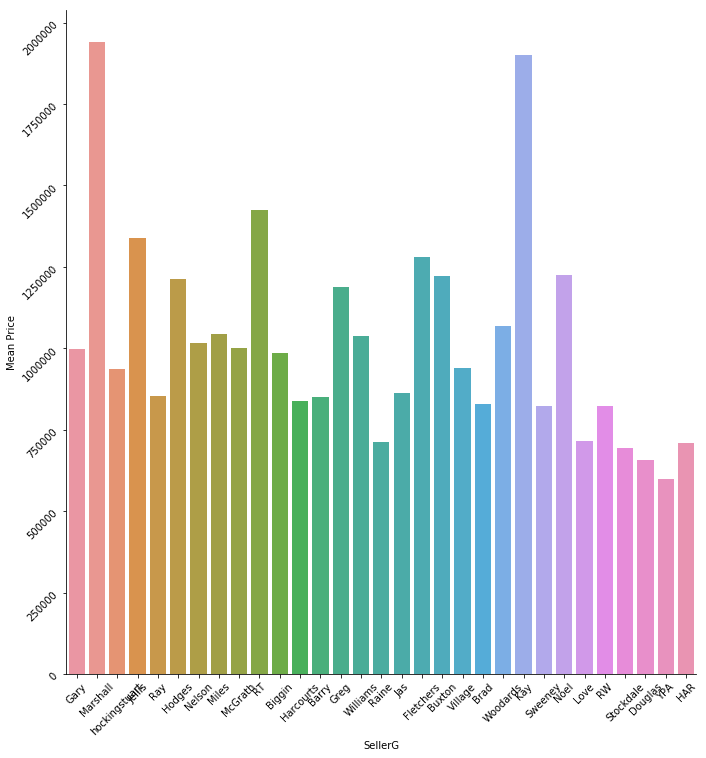

In [82]:
top_sel = sns.factorplot(data=top_sellers_train_set, x="SellerG", y="Price", kind="bar", size=10, ci=None)
plt.ylabel("Mean Price")
l1 = top_sel.set_yticklabels(rotation = 45)
l2 = top_sel.set_xticklabels(rotation = 45)

In [83]:
training_set['SellerG'] = pd.Categorical(training_set['SellerG'])
training_set['SellerG'] = training_set['SellerG'].cat.codes
training_set['SellerG'].value_counts().head()

177    1808
126    1615
285    1407
20     1370
220     951
Name: SellerG, dtype: int64

In [84]:
training_set.dtypes

Rooms            float64
Type                int8
Price            float64
SellerG            int16
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
sold_year          int64
Landsize_log     float64
Method_SP          uint8
Method_PI          uint8
Method_PN          uint8
Method_SN          uint8
Method_NB          uint8
Method_VB          uint8
Method_W           uint8
Method_SA          uint8
Method_SS          uint8
Method_N/A         uint8
dtype: object

In [85]:
input_features = [x for x in training_set.columns if x not in ['Price']]

In [86]:
input_features

['Rooms',
 'Type',
 'SellerG',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'BuildingArea',
 'YearBuilt',
 'Propertycount',
 'sold_year',
 'Landsize_log',
 'Method_SP',
 'Method_PI',
 'Method_PN',
 'Method_SN',
 'Method_NB',
 'Method_VB',
 'Method_W',
 'Method_SA',
 'Method_SS',
 'Method_N/A']

In [91]:
X_train = training_set[input_features].values
y_train = training_set['Price'].values

In [95]:
X_train

array([[  3.,   0.,  98., ...,   0.,   0.,   0.],
       [  3.,   0., 158., ...,   0.,   0.,   0.],
       [  3.,   0., 285., ...,   0.,   0.,   0.],
       ...,
       [  3.,   1., 177., ...,   0.,   0.,   0.],
       [  5.,   0., 184., ...,   0.,   0.,   0.],
       [  3.,   0., 186., ...,   0.,   0.,   0.]])

In [92]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [89]:
y_train_pred = lr_model.predict(X_train)

NameError: name 'lr_model' is not defined

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_train_pred)
print(r2)